# Download and prepare the data

## Project description

Beta Bank customers are leaving: little by little, chipping away every month. The bankers figured out it’s cheaper to save the existing customers rather than to attract new ones.

We need to predict whether a customer will leave the bank soon. We have the data on clients’ past behavior and termination of contracts with the bank.

We need to Build a model with the maximum possible F1 score. The F1 score should be of at least 0.59. 
Additionally, we will measure the AUC-ROC metric and compare it with the F1.


## Import

In [1918]:
!pip install imbalanced-learn

In [1919]:
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

from sklearn.metrics import f1_score

from imblearn.over_sampling import SMOTE

from sklearn.metrics import confusion_matrix, roc_auc_score, plot_roc_curve

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.utils import shuffle

from sklearn.metrics import precision_score, recall_score

from sklearn.preprocessing import StandardScaler

# temp import
#from pandas_profiling import ProfileReport

profile = ProfileReport(data)
profile
profile.to_file(output_file="report.html")

## Load data


In [1920]:
try:
    data = pd.read_csv('Churn.csv')
except:
    data = pd.read_csv('datasets/Churn.csv')

## Check the data

**Features**

- RowNumber — data string index
- CustomerId — unique customer identifier
- Surname — surname
- CreditScore — credit score
- Geography — country of residence
- Gender — gender
- Age — age
- Tenure — period of maturation for a customer’s fixed deposit (years)
- Balance — account balance
- NumOfProducts — number of banking products used by the customer
- HasCrCard — customer has a credit card
- IsActiveMember — customer’s activeness
- EstimatedSalary — estimated salary


**Target**

- Exited — сustomer has left

In [1921]:
data.sample(5)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
8872,8873,15626475,Gamble,685,France,Male,30,2.0,0.00,2,1,1,140889.32,0
6111,6112,15803337,Baresi,648,France,Male,23,9.0,168372.52,1,1,0,134676.72,0
9583,9584,15729019,Arcuri,602,Spain,Male,34,8.0,98382.72,1,1,0,39542.00,0
6736,6737,15771299,Nnachetam,707,France,Female,57,1.0,92053.00,1,1,1,164064.44,1
3533,3534,15808557,Mancini,695,France,Female,42,5.0,0.00,1,0,1,72172.13,1


In [1922]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           9091 non-null   float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


Only Tenure have missing

In [1923]:
data.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,9091.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,4.997690,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.894723,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,2.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


CreditScore mean and median are almost identical with low std

Age mean and median are almost identical. The youngest user is 18.

Tenure mean and median are almost identical std is high. almost the same as the mean value.

Balance mean is much lower then the median. Since the Q1 is 0 we can assume lot of observations have 0 balance.

NumOfProducts varies between 1 to 4.

HasCrCard is boolean - 0 for no 1 for yes. Same for IsActiveMember.

EstimatedSalary mean and median are almost identical. High std

Exited is boolean - 0 for no 1 for yes.



## Treating missing values

We will replace the missing values with -1 to distinguish the observation with 0 deposit to places with no tracked deposit at all that also may be 0 deposit
imp

In [1924]:
data['Tenure'].fillna(-1, inplace=True)

## Transforming categorical features into numerical features

### Geography

In [1925]:
# create dummies for Geography
data_ohe = pd.get_dummies(data['Geography'], drop_first=True)

In [1926]:
# join the data with the ohe data of the Geography
data_modified = data.drop('Geography', axis=1).join(data_ohe)

In [1927]:
data_modified.sample(3)

,RowNumber,CustomerId,Surname,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Germany,Spain
8802,8803,15714642,Hawkins,792,Female,40,-1.0,0.00,1,1,0,141652.20,0,0,1
1944,1945,15687310,Humphries,783,Male,39,9.0,0.00,2,1,0,143752.77,0,0,1
5376,5377,15602500,Maslova,850,Male,38,1.0,146343.98,1,0,1,103902.11,0,0,1


### Gender

Repeat the same steps on data_modified for ohe here

In [1928]:

data_ohe = pd.get_dummies(data_modified['Gender'], drop_first=True)
data_modified = data_modified.drop('Gender', axis=1).join(data_ohe)
data_modified.sample(3)

,RowNumber,CustomerId,Surname,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Germany,Spain,Male
2900,2901,15668575,Hao,626,26,-1.0,148610.41,3,0,1,104502.02,1,0,1,0
3774,3775,15691785,Findlay,850,61,1.0,0.00,1,1,0,53067.83,1,0,0,1
8188,8189,15623314,Tucker,506,59,3.0,190353.08,1,1,0,78365.75,0,1,0,0


## Features scaling

Scale the numeric features 

In [1929]:
data_modified

,RowNumber,CustomerId,Surname,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Germany,Spain,Male
0,1,15634602,Hargrave,619,42,2.0,0.00,1,1,1,101348.88,1,0,0,0
1,2,15647311,Hill,608,41,1.0,83807.86,1,0,1,112542.58,0,0,1,0
2,3,15619304,Onio,502,42,8.0,159660.80,3,1,0,113931.57,1,0,0,0
3,4,15701354,Boni,699,39,1.0,0.00,2,0,0,93826.63,0,0,0,0
4,5,15737888,Mitchell,850,43,2.0,125510.82,1,1,1,79084.10,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,39,5.0,0.00,2,1,0,96270.64,0,0,0,1
9996,9997,15569892,Johnstone,516,35,10.0,57369.61,1,1,1,101699.77,0,0,0,1
9997,9998,15584532,Liu,709,36,7.0,0.00,1,0,1,42085.58,1,0,0,0
9998,9999,15682355,Sabbatini,772,42,3.0,75075.31,2,1,0,92888.52,1,1,0,1


In [1930]:
numeric = ['CreditScore', 'Age', 'Tenure', 'Balance', 'EstimatedSalary', 'NumOfProducts']

In [1931]:
# train the scaler
scaler = StandardScaler()
scaler.fit(data_modified[numeric]) 

StandardScaler()

In [1932]:
# create copy of the modified data
data_modified_scaled = data_modified.copy(deep=True)

In [1933]:
# produced scaled data
data_modified_scaled[numeric] = scaler.transform(data_modified[numeric])

In [1934]:
# print sample
data_modified_scaled

,RowNumber,CustomerId,Surname,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Germany,Spain,Male
0,1,15634602,Hargrave,-0.326221,0.293517,-0.753651,-1.225848,-0.911583,1,1,0.021886,1,0,0,0
1,2,15647311,Hill,-0.440036,0.198164,-1.060950,0.117350,-0.911583,0,1,0.216534,0,0,1,0
2,3,15619304,Onio,-1.536794,0.293517,1.090144,1.333053,2.527057,1,0,0.240687,1,0,0,0
3,4,15701354,Boni,0.501521,0.007457,-1.060950,-1.225848,0.807737,0,0,-0.108918,0,0,0,0
4,5,15737888,Mitchell,2.063884,0.388871,-0.753651,0.785728,-0.911583,1,1,-0.365276,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,1.246488,0.007457,0.168246,-1.225848,0.807737,1,0,-0.066419,0,0,0,1
9996,9997,15569892,Johnstone,-1.391939,-0.373958,1.704742,-0.306379,-0.911583,1,1,0.027988,0,0,0,1
9997,9998,15584532,Liu,0.604988,-0.278604,0.782845,-1.225848,-0.911583,0,1,-1.008643,1,0,0,0
9998,9999,15682355,Sabbatini,1.256835,0.293517,-0.446352,-0.022608,0.807737,1,0,-0.125231,1,1,0,1


Use the modified data with scaling

In [1935]:
data_modified = data_modified_scaled.copy(deep=True)

## Features selection
In the data we have RowNumber, CustomerId. This info is irrelevant for our prediction because ID are given randomly to users and row number is arbitrary. Lets see if surname is also irrelevant 

In [1936]:
data_modified['Surname'].value_counts()

Smith       32
Scott       29
Martin      29
Walker      28
Brown       26
            ..
Izmailov     1
Bold         1
Bonham       1
Poninski     1
Burbidge     1
Name: Surname, Length: 2932, dtype: int64

We can also remove this column. It's irrelevant feature for us also. 

In [1937]:
# remove irrelevant columns and remain only with relevant features and target
data_modified = data_modified.drop(['Surname', 'RowNumber', 'CustomerId'], axis=1)
data_modified.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Germany,Spain,Male
0,-0.326221,0.293517,-0.753651,-1.225848,-0.911583,1,1,0.021886,1,0,0,0
1,-0.440036,0.198164,-1.060950,0.117350,-0.911583,0,1,0.216534,0,0,1,0
2,-1.536794,0.293517,1.090144,1.333053,2.527057,1,0,0.240687,1,0,0,0
3,0.501521,0.007457,-1.060950,-1.225848,0.807737,0,0,-0.108918,0,0,0,0
4,2.063884,0.388871,-0.753651,0.785728,-0.911583,1,1,-0.365276,0,0,1,0


## Check for correlations

In [1938]:
corr = data_modified.corr()

In [1939]:
fig = px.imshow(corr)
fig.show()

We can see that Exited which is the target have positive correlation with Age. Beside that residence of Germany have good balance

In [1940]:
data_modified


,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Germany,Spain,Male
0,-0.326221,0.293517,-0.753651,-1.225848,-0.911583,1,1,0.021886,1,0,0,0
1,-0.440036,0.198164,-1.060950,0.117350,-0.911583,0,1,0.216534,0,0,1,0
2,-1.536794,0.293517,1.090144,1.333053,2.527057,1,0,0.240687,1,0,0,0
3,0.501521,0.007457,-1.060950,-1.225848,0.807737,0,0,-0.108918,0,0,0,0
4,2.063884,0.388871,-0.753651,0.785728,-0.911583,1,1,-0.365276,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1.246488,0.007457,0.168246,-1.225848,0.807737,1,0,-0.066419,0,0,0,1
9996,-1.391939,-0.373958,1.704742,-0.306379,-0.911583,1,1,0.027988,0,0,0,1
9997,0.604988,-0.278604,0.782845,-1.225848,-0.911583,0,1,-1.008643,1,0,0,0
9998,1.256835,0.293517,-0.446352,-0.022608,0.807737,1,0,-0.125231,1,1,0,1


In [1941]:
data_modified.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  float64
 1   Age              10000 non-null  float64
 2   Tenure           10000 non-null  float64
 3   Balance          10000 non-null  float64
 4   NumOfProducts    10000 non-null  float64
 5   HasCrCard        10000 non-null  int64  
 6   IsActiveMember   10000 non-null  int64  
 7   EstimatedSalary  10000 non-null  float64
 8   Exited           10000 non-null  int64  
 9   Germany          10000 non-null  uint8  
 10  Spain            10000 non-null  uint8  
 11  Male             10000 non-null  uint8  
dtypes: float64(6), int64(3), uint8(3)
memory usage: 732.5 KB


# Examine the balance of classes

## Split the modified data into a training, validation and test set

Lets train a model with the modified data as it is without taking into account the imbalance

This is a classification task so we will check which learning algorithm for classification yields the best F1 score. The models we will check are: Decision tree, Random forest and Logistic regression.

For checking the balance necessity we will use the simple Decision tree model only.

Split the data

In [1942]:
df_train, df_valid_and_test = train_test_split(data_modified, test_size=0.4, random_state=12345)
df_valid, df_test = train_test_split(df_valid_and_test, test_size=0.5, random_state=12345)

For final training on a larger set - create a concat df of train and validation set

In [1943]:
# concat the train and valid data 
df_train_and_valid = pd.concat([df_train, df_valid], ignore_index=True)

In [1944]:

features_train = df_train.drop(['Exited'], axis=1)
target_train = df_train['Exited']
features_valid = df_valid.drop(['Exited'], axis=1)
target_valid = df_valid['Exited']
features_test = df_test.drop(['Exited'], axis=1)
target_test = df_test['Exited']

# split also the concat df
features_train_and_valid = df_train_and_valid.drop(['Exited'], axis=1)
target_train_and_valid = df_train_and_valid['Exited']


Create a function to see the share of exited observation from the data

In [1945]:
def proportion_of_1(df, target):
    value_count = df[target].value_counts()
    proportion = df[target].value_counts()[1]/(
        df[target].value_counts()[1]+df[target].value_counts()[0])
    return round(proportion, 2)

In [1946]:
print('df original proportion:', proportion_of_1(df=data_modified, target='Exited'))
print()
print('df_train proportion:', proportion_of_1(df=df_train, target='Exited'))
print('df_valid proportion:', proportion_of_1(df=df_valid, target='Exited'))
print('df_test proportion:', proportion_of_1(df=df_test, target='Exited'))


df original proportion: 0.2

df_train proportion: 0.2
df_valid proportion: 0.21
df_test proportion: 0.21


We have much higher share of non exited observation. Probably balance needed. This time we will test without

create features and target 

## Train the model

### Desicion tree

loop tree depth to optimize the model depth with best accuracy

In [1947]:
best_depth = 0
best_f1_score = 0
for depth in range(1,10):
    model = DecisionTreeClassifier(random_state=12345, max_depth=depth) # create a model with the given depth
    model.fit(features_train, target_train) # train the model
    predictions_dt_valid = model.predict(features_valid) # get the model's predictions
    my_f1_score = f1_score(target_valid, predictions_dt_valid)
    print("max_depth =", depth, ": ", end='')
    print(round(my_f1_score, 3))
    if my_f1_score > best_f1_score:
        best_f1_score = my_f1_score
        best_depth = depth
print()
print("F1 of the best model is (best_depth = {}): {}".format(best_depth, round(best_f1_score,3)))
    

max_depth = 1 : 0.0
max_depth = 2 : 0.522
max_depth = 3 : 0.423
max_depth = 4 : 0.553
max_depth = 5 : 0.541
max_depth = 6 : 0.57
max_depth = 7 : 0.526
max_depth = 8 : 0.534
max_depth = 9 : 0.563

F1 of the best model is (best_depth = 6): 0.57


Now we will build a model and save it under the name - model_dt dt- desicion tree

In [1948]:
# create model desicion tree on the chosen depth
model_dt = DecisionTreeClassifier(random_state=12345, max_depth=best_depth)
model_dt.fit(features_train, target_train) # train the model
predictions_valid_dt = model_dt.predict(features_valid) # get the model's predictions
my_f1_score = f1_score(target_valid, predictions_valid_dt)
print("F1 score is: {}".format(round(my_f1_score,3)))

F1 score is: 0.57


calculate the ROC_AUC

In [1949]:
my_roc_auc_score = roc_auc_score(target_valid, predictions_valid_dt)
print("ROC/AUC: {}".format(my_roc_auc_score))


ROC/AUC: 0.7078133789824521


Add the results to results data frame

In [1950]:
col = ('model_name', 'balance_type', 'threshold', 'F1_score', 'ROC_AUC_score') 
results_df = pd.DataFrame(columns=col)

Create a function to add results to results_df

In [1951]:
def add_data_to_results_df(model_name:str,
                           balance_type:str,
                           threshold:str,
                           F1_score:float,
                           ROC_AUC_score:float,
                           temp_results_df):
    data = {'model_name': [model_name],
        'balance_type': [balance_type],
        'threshold': [threshold],
        'F1_score': [F1_score],
        'ROC_AUC_score': [ROC_AUC_score],
       }
    temp_df = pd.DataFrame.from_dict(data)
    temp_results_df = temp_results_df.append(temp_df, ignore_index=True)
    return temp_results_df

In [1952]:
results_df = add_data_to_results_df(model_name='desicion_tree',
                                   balance_type='no',
                                   threshold='no',
                                   F1_score=my_f1_score,
                                   ROC_AUC_score=my_roc_auc_score,
                                   temp_results_df=results_df)
results_df

,model_name,balance_type,threshold,F1_score,ROC_AUC_score
0,desicion_tree,no,no,0.569697,0.707813


# Improve the quality of the model by fixing class imbalance

### Continue with desicion tree

#### Balance desicion tree model with upsample

Write a fuction to upsample the minority class

In [1953]:
def upsample(features, target, repeat):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_upsampled = pd.concat([features_zeros] + [features_ones] * repeat)
    target_upsampled = pd.concat([target_zeros] + [target_ones] * repeat)

    features_upsampled, target_upsampled = shuffle(
        features_upsampled, target_upsampled, random_state=12345
    )

    return features_upsampled, target_upsampled

Continue with the desicion treee model from last chapter. This time with balancing the existing class

Iterate manually with the upsample factor and found that multiply by 2 gives best results

In [1954]:
features_upsampled, target_upsampled = upsample(
    features_train, target_train, 2
)

In [1955]:
target_upsampled.value_counts()[1]/len(target_upsampled)

0.33240689271817675

In [1956]:
best_depth = 0
best_f1_score = 0
for depth in range(1,10):
    model = DecisionTreeClassifier(random_state=12345, max_depth=depth) # create a model with the given depth
    model.fit(features_upsampled, target_upsampled) # train the model
    predictions_dt_valid = model.predict(features_valid) # get the model's predictions
    my_f1_score = f1_score(target_valid, predictions_dt_valid)
    print("max_depth =", depth, ": ", end='')
    print(round(my_f1_score, 3))
    if my_f1_score > best_f1_score:
        best_f1_score = my_f1_score
        best_depth = depth
print()
print("F1 of the best model is (best_depth = {}): {}".format(best_depth, round(best_f1_score,3)))

max_depth = 1 : 0.499
max_depth = 2 : 0.522
max_depth = 3 : 0.547
max_depth = 4 : 0.573
max_depth = 5 : 0.58
max_depth = 6 : 0.598
max_depth = 7 : 0.579
max_depth = 8 : 0.559
max_depth = 9 : 0.585

F1 of the best model is (best_depth = 6): 0.598


In [1957]:
model_dt_upsample = DecisionTreeClassifier(random_state=12345, max_depth=best_depth)
model_dt_upsample.fit(features_upsampled, target_upsampled)
predicted_valid_dt_upsample = model_dt_upsample.predict(features_valid)

In [1958]:
my_f1_score = best_f1_score
print("F1 score is: {}".format(round(my_f1_score,3)))

F1 score is: 0.598


In [1959]:
my_roc_auc_score = roc_auc_score(target_valid, predicted_valid_dt_upsample)
print("ROC/AUC: {}".format(my_roc_auc_score))

ROC/AUC: 0.730808316043528


In [1960]:
results_df = add_data_to_results_df(model_name='desicion_tree',
                                   balance_type='upsample',
                                   threshold='no',
                                   F1_score=my_f1_score,
                                   ROC_AUC_score=my_roc_auc_score,
                                   temp_results_df=results_df)
results_df

,model_name,balance_type,threshold,F1_score,ROC_AUC_score
0,desicion_tree,no,no,0.569697,0.707813
1,desicion_tree,upsample,no,0.597796,0.730808


#### Balance desicion tree model with class_weight

In [1961]:
best_depth = 0
best_f1_score = 0
for depth in range(1,10):
    model = DecisionTreeClassifier(random_state=12345, max_depth=depth, class_weight='balanced') # create a model with the given depth
    model.fit(features_train, target_train) # train the model
    predictions_dt_valid = model.predict(features_valid) # get the model's predictions
    my_f1_score = f1_score(target_valid, predictions_dt_valid)
    print("max_depth =", depth, ": ", end='')
    print(round(my_f1_score, 3))
    if my_f1_score > best_f1_score:
        best_f1_score = my_f1_score
        best_depth = depth
print()
print("F1 of the best model is (best_depth = {}): {}".format(best_depth, round(best_f1_score,3)))
    

max_depth = 1 : 0.499
max_depth = 2 : 0.541
max_depth = 3 : 0.541
max_depth = 4 : 0.528
max_depth = 5 : 0.596
max_depth = 6 : 0.558
max_depth = 7 : 0.556
max_depth = 8 : 0.54
max_depth = 9 : 0.535

F1 of the best model is (best_depth = 5): 0.596


Now we will build a model and save it under the name - model_dt dt- desicion tree

In [1962]:
# create model desicion tree on the chosen depth
model_dt_balanced = DecisionTreeClassifier(random_state=12345, max_depth=best_depth,  class_weight='balanced')
model_dt_balanced.fit(features_train, target_train) # train the model
predictions_valid_dt_balanced = model_dt_balanced.predict(features_valid) # get the model's predictions
my_f1_score = f1_score(target_valid, predictions_valid_dt_balanced)
print("F1 score is: {}".format(round(my_f1_score,3)))

F1 score is: 0.596


calculate the ROC_AUC

In [1963]:
my_roc_auc_score = roc_auc_score(target_valid, predictions_valid_dt_balanced)
print("ROC/AUC: {}".format(my_roc_auc_score))


ROC/AUC: 0.7587588238496482


In [1964]:
results_df = add_data_to_results_df(model_name='desicion_tree',
                                   balance_type='class_weigh=balanced',
                                   threshold='no',
                                   F1_score=my_f1_score,
                                   ROC_AUC_score=my_roc_auc_score,
                                   temp_results_df=results_df)
results_df

,model_name,balance_type,threshold,F1_score,ROC_AUC_score
0,desicion_tree,no,no,0.569697,0.707813
1,desicion_tree,upsample,no,0.597796,0.730808
2,desicion_tree,class_weigh=balanced,no,0.596379,0.758759


## Test other models for classification

### Random Forest

#### No balance

In [1965]:
best_f1_score = 0
best_est = 0
best_depth = 0
for est in range(1, 15): # choose hyperparameter range
    for depth in range(1,10):
        model = RandomForestClassifier(random_state=12345, n_estimators=est, max_depth=depth) # set number of trees
        model.fit(features_train, target_train) # train model on training set
        predictions_rf_valid = model.predict(features_valid) # get the model's predictions
        my_rf_f1_score = f1_score(target_valid, predictions_rf_valid)
        if my_rf_f1_score > best_f1_score:
            best_f1_score = my_rf_f1_score # save best f1 score on validation set
            best_est = est# save number of estimators corresponding to best accuracy score
            best_depth = depth

print("F1 score of the best model on the validation set\
(n_estimators = {}, max_depth = {}): {}".format(best_est, best_depth, best_f1_score))


F1 score of the best model on the validation set(n_estimators = 6, max_depth = 9): 0.5787106446776611


In [1966]:
# create model random forest on the chosen n_estimators
model_rf = RandomForestClassifier(random_state=12345, n_estimators=best_est, max_depth=best_depth)
model_rf.fit(features_train, target_train) # train the model
predictions_valid_rf = model_rf.predict(features_valid) # get the model's predictions

In [1967]:
my_f1_score = f1_score(target_valid, predictions_valid_rf)
print("F1 score is: {}".format(round(my_f1_score,3)))

F1 score is: 0.579


In [1968]:
my_roc_auc_score = roc_auc_score(target_valid, predictions_valid_rf)
print("ROC/AUC: {}".format(my_roc_auc_score))

ROC/AUC: 0.713162128974891


In [1969]:
results_df = add_data_to_results_df(model_name='random_forest',
                                   balance_type='no',
                                   threshold='no',
                                   F1_score=my_f1_score,
                                   ROC_AUC_score=my_roc_auc_score,
                                   temp_results_df=results_df)
results_df

,model_name,balance_type,threshold,F1_score,ROC_AUC_score
0,desicion_tree,no,no,0.569697,0.707813
1,desicion_tree,upsample,no,0.597796,0.730808
2,desicion_tree,class_weigh=balanced,no,0.596379,0.758759
3,random_forest,no,no,0.578711,0.713162


#### With balance - upsample approach

In [1970]:
features_upsampled, target_upsampled = upsample(
    features_train, target_train, 4
)

In [1971]:
target_upsampled.value_counts()[1]/len(target_upsampled)

0.49895702962035876

In [1972]:
best_f1_score = 0
best_est = 0
best_depth = 0
for est in range(1, 15): # choose hyperparameter range
    for depth in range(1,10):
        model = RandomForestClassifier(random_state=12345, n_estimators=est, max_depth=depth) # set number of trees
        model.fit(features_upsampled, target_upsampled) # train model on training set
        predictions_rf_valid = model.predict(features_valid) # get the model's predictions
        my_rf_f1_score = f1_score(target_valid, predictions_rf_valid)
        if my_rf_f1_score > best_f1_score:
            best_f1_score = my_rf_f1_score # save best f1 score on validation set
            best_est = est# save number of estimators corresponding to best accuracy score
            best_depth = depth

print("F1 score of the best model on the validation set\
(n_estimators = {}, max_depth = {}): {}".format(best_est, best_depth, best_f1_score))


F1 score of the best model on the validation set(n_estimators = 12, max_depth = 8): 0.6193415637860082


In [1973]:
# create model random forest on the chosen n_estimators
model_rf_upsampled = RandomForestClassifier(random_state=12345, n_estimators=best_est, max_depth=best_depth)
model_rf_upsampled.fit(features_upsampled, target_upsampled) # train the model
predictions_valid_rf_upsampled = model_rf_upsampled.predict(features_valid) # get the model's predictions

In [1974]:
my_f1_score = f1_score(target_valid, predictions_valid_rf_upsampled)
print("F1 score is: {}".format(round(my_f1_score,3)))

F1 score is: 0.619


In [1975]:
my_roc_auc_score = roc_auc_score(target_valid, predictions_valid_rf_upsampled)
print("ROC/AUC: {}".format(my_roc_auc_score))

ROC/AUC: 0.7800857735650469


In [1976]:
results_df = add_data_to_results_df(model_name='random_forest',
                                   balance_type='upsample',
                                   threshold='no',
                                   F1_score=my_f1_score,
                                   ROC_AUC_score=my_roc_auc_score,
                                   temp_results_df=results_df)
results_df

,model_name,balance_type,threshold,F1_score,ROC_AUC_score
0,desicion_tree,no,no,0.569697,0.707813
1,desicion_tree,upsample,no,0.597796,0.730808
2,desicion_tree,class_weigh=balanced,no,0.596379,0.758759
3,random_forest,no,no,0.578711,0.713162
4,random_forest,upsample,no,0.619342,0.780086


#### With balance - class weigh approach

In [1977]:
best_f1_score = 0
best_est = 0
best_depth = 0
for est in range(1, 15): # choose hyperparameter range
    for depth in range(1,10):
        model = RandomForestClassifier(random_state=12345,
                                       n_estimators=est, max_depth=depth,
                                       class_weight='balanced') # set number of trees
        model.fit(features_train, target_train) # train model on training set
        predictions_rf_valid = model.predict(features_valid) # get the model's predictions
        my_rf_f1_score = f1_score(target_valid, predictions_rf_valid)
        if my_rf_f1_score > best_f1_score:
            best_f1_score = my_rf_f1_score # save best f1 score on validation set
            best_est = est# save number of estimators corresponding to best accuracy score
            best_depth = depth

print("F1 score of the best model on the validation set\
(n_estimators = {}, max_depth = {}): {}".format(best_est, best_depth, best_f1_score))


F1 score of the best model on the validation set(n_estimators = 7, max_depth = 7): 0.6223628691983123


In [1978]:
# create model random forest on the chosen n_estimators
model_rf_balanced = RandomForestClassifier(random_state=12345,
                                           n_estimators=best_est,
                                           max_depth=best_depth,
                                           class_weight='balanced')
model_rf_balanced.fit(features_train, target_train) # train the model
predictions_valid_rf_balanced = model_rf_balanced.predict(features_valid) # get the model's predictions

In [1979]:
my_f1_score = f1_score(target_valid, predictions_valid_rf_balanced)
print("F1 score is: {}".format(round(my_f1_score,3)))

F1 score is: 0.622


In [1980]:
my_roc_auc_score = roc_auc_score(target_valid, predictions_valid_rf_balanced)
print("ROC/AUC: {}".format(my_roc_auc_score))

ROC/AUC: 0.7785977413364465


In [1981]:
results_df = add_data_to_results_df(model_name='random_forest',
                                   balance_type='class_weigh=balanced',
                                   threshold='no',
                                   F1_score=my_f1_score,
                                   ROC_AUC_score=my_roc_auc_score,
                                   temp_results_df=results_df)
results_df

,model_name,balance_type,threshold,F1_score,ROC_AUC_score
0,desicion_tree,no,no,0.569697,0.707813
1,desicion_tree,upsample,no,0.597796,0.730808
2,desicion_tree,class_weigh=balanced,no,0.596379,0.758759
3,random_forest,no,no,0.578711,0.713162
4,random_forest,upsample,no,0.619342,0.780086
5,random_forest,class_weigh=balanced,no,0.622363,0.778598


### Logistic regression

#### No balance

In [1982]:
model_lr = LogisticRegression(random_state=12345, solver='liblinear')
model_lr.fit(features_train, target_train)
pred_lr = model_lr.predict(features_valid)

In [1983]:
my_f1_score = f1_score(target_valid, pred_lr)
print("F1 score is: {}".format(round(my_f1_score,3)))

F1 score is: 0.334


In [1984]:
my_roc_auc_score = roc_auc_score(target_valid, pred_lr)
print("ROC/AUC: {}".format(my_roc_auc_score))

ROC/AUC: 0.5944008250715284


In [1985]:
results_df = add_data_to_results_df(model_name='logistic_regression',
                                   balance_type='no',
                                   threshold='no',
                                   F1_score=my_f1_score,
                                   ROC_AUC_score=my_roc_auc_score,
                                   temp_results_df=results_df)
results_df

,model_name,balance_type,threshold,F1_score,ROC_AUC_score
0,desicion_tree,no,no,0.569697,0.707813
1,desicion_tree,upsample,no,0.597796,0.730808
2,desicion_tree,class_weigh=balanced,no,0.596379,0.758759
3,random_forest,no,no,0.578711,0.713162
4,random_forest,upsample,no,0.619342,0.780086
5,random_forest,class_weigh=balanced,no,0.622363,0.778598
6,logistic_regression,no,no,0.333895,0.594401


#### With balance - SMOTE approach

In [1986]:
sm = SMOTE(random_state=12345)
features_train_res, target_train_res = sm.fit_resample(features_train, target_train)

In [1987]:
# Before upsampling
target_train.value_counts()

0    4804
1    1196
Name: Exited, dtype: int64

In [1988]:
# After upsampling
target_train_res.value_counts()

0    4804
1    4804
Name: Exited, dtype: int64

In [1989]:
model_lr_smote = LogisticRegression(random_state=12345, solver='liblinear')
model_lr_smote.fit(features_train_res, target_train_res)
pred_lr_smote = model_lr_smote.predict(features_valid)

In [1990]:
my_f1_score = f1_score(target_valid, pred_lr_smote)
print("F1 score is: {}".format(round(my_f1_score,3)))

F1 score is: 0.491


In [1991]:
my_roc_auc_score = roc_auc_score(target_valid, pred_lr_smote)
print("ROC/AUC: {}".format(my_roc_auc_score))

ROC/AUC: 0.6952316430658304


In [1992]:
results_df = add_data_to_results_df(model_name='logistic_regression',
                                   balance_type='SMOTE',
                                   threshold='no',
                                   F1_score=my_f1_score,
                                   ROC_AUC_score=my_roc_auc_score,
                                   temp_results_df=results_df)
results_df

,model_name,balance_type,threshold,F1_score,ROC_AUC_score
0,desicion_tree,no,no,0.569697,0.707813
1,desicion_tree,upsample,no,0.597796,0.730808
2,desicion_tree,class_weigh=balanced,no,0.596379,0.758759
3,random_forest,no,no,0.578711,0.713162
4,random_forest,upsample,no,0.619342,0.780086
5,random_forest,class_weigh=balanced,no,0.622363,0.778598
6,logistic_regression,no,no,0.333895,0.594401
7,logistic_regression,SMOTE,no,0.491228,0.695232


In [1993]:
probabilities_lr_valid = model_lr_smote.predict_proba(features_valid)
probabilities_lr_one_valid = probabilities_lr_valid[:, 1]

In [1994]:
best_f1_score_treshold_adj = 0
best_threshold = 0
for threshold in np.arange(0, 0.8, 0.02):
    predicted_valid = probabilities_lr_one_valid > threshold # < write code here >
    precision = precision_score(target_valid, predicted_valid)# < write code here >
    recall = recall_score(target_valid, predicted_valid)# < write code here >
    my_f1_score = f1_score(target_valid, predicted_valid)

    print(
        	'Threshold = {:.2f} | Precision = {:.3f}, Recall = {:.3f}, F1 score = {:.3f} '.format(
            	threshold, precision, recall, my_f1_score
        	)
    	)
    if my_f1_score > best_f1_score_treshold_adj:
        best_f1_score_treshold_adj = my_f1_score
        best_threshold = threshold
        
print()
print('F1 score = {:.3f} | Threshold = {:.2f} '.format(best_f1_score_treshold_adj, best_threshold))
    

Threshold = 0.00 | Precision = 0.209, Recall = 1.000, F1 score = 0.346 
Threshold = 0.02 | Precision = 0.209, Recall = 1.000, F1 score = 0.346 
Threshold = 0.04 | Precision = 0.212, Recall = 1.000, F1 score = 0.349 
Threshold = 0.06 | Precision = 0.217, Recall = 1.000, F1 score = 0.356 
Threshold = 0.08 | Precision = 0.222, Recall = 0.988, F1 score = 0.363 
Threshold = 0.10 | Precision = 0.229, Recall = 0.983, F1 score = 0.372 
Threshold = 0.12 | Precision = 0.237, Recall = 0.981, F1 score = 0.381 
Threshold = 0.14 | Precision = 0.243, Recall = 0.971, F1 score = 0.388 
Threshold = 0.16 | Precision = 0.248, Recall = 0.952, F1 score = 0.394 
Threshold = 0.18 | Precision = 0.253, Recall = 0.935, F1 score = 0.398 
Threshold = 0.20 | Precision = 0.260, Recall = 0.919, F1 score = 0.406 
Threshold = 0.22 | Precision = 0.266, Recall = 0.907, F1 score = 0.412 
Threshold = 0.24 | Precision = 0.272, Recall = 0.897, F1 score = 0.417 
Threshold = 0.26 | Precision = 0.276, Recall = 0.876, F1 score =

In [1995]:
predicted_valid_threshold = probabilities_lr_one_valid > best_threshold 

In [1996]:
my_f1_score = f1_score(target_valid, predicted_valid_threshold)
print("F1 score is: {}".format(round(my_f1_score,3)))

F1 score is: 0.491


In [1997]:
my_roc_auc_score = roc_auc_score(target_valid, predicted_valid_threshold)
print("ROC/AUC: {}".format(my_roc_auc_score))

ROC/AUC: 0.6952316430658304


In [1998]:
results_df = add_data_to_results_df(model_name='logistic_regression',
                                   balance_type='SMOTE',
                                   threshold=f'adjust to {best_threshold}',
                                   F1_score=my_f1_score,
                                   ROC_AUC_score=my_roc_auc_score,
                                   temp_results_df=results_df)
results_df

,model_name,balance_type,threshold,F1_score,ROC_AUC_score
0,desicion_tree,no,no,0.569697,0.707813
1,desicion_tree,upsample,no,0.597796,0.730808
2,desicion_tree,class_weigh=balanced,no,0.596379,0.758759
3,random_forest,no,no,0.578711,0.713162
4,random_forest,upsample,no,0.619342,0.780086
5,random_forest,class_weigh=balanced,no,0.622363,0.778598
6,logistic_regression,no,no,0.333895,0.594401
7,logistic_regression,SMOTE,no,0.491228,0.695232
8,logistic_regression,SMOTE,adjust to 0.5,0.491228,0.695232


## Training summary

### Post evaluation - use confusion matrix

The best models are balanced random forest with both balance approach - upsample and class_weigh=balance. We will test the confusion matrix for both to determine which is better

Let's create a function to produce confusion matrix heatmap

In [1999]:
def confusion_matrix_heatmap(target_valid_1, predictions_valid_1):
    cf_matrix = confusion_matrix(target_valid_1, predictions_valid_1)
    
    plt.figure(figsize=(10, 5), dpi=80)

    ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues', fmt='g')

    ax.set_xlabel('\nPredicted Values')
    ax.set_ylabel('Actual Values ');

    ## Ticket labels - List must be in alphabetical order
    ax.xaxis.set_ticklabels(['0','1'])
    ax.yaxis.set_ticklabels(['0','1'])

    ## Display the visualization of the Confusion Matrix.
    plt.show()

Confusion matrix for random forest balance by upsample

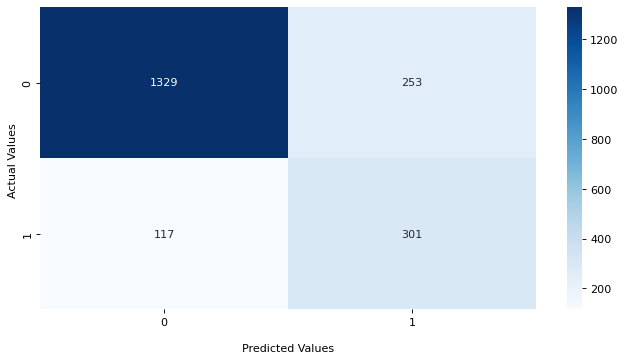

In [2000]:
confusion_matrix_heatmap(target_valid, predictions_valid_rf_upsampled)

Confusion matrix for random forest balance by class weigh

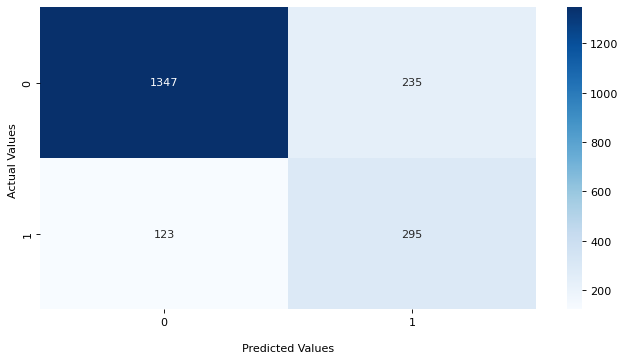

In [2001]:
confusion_matrix_heatmap(target_valid, predictions_valid_rf_balanced)

In the upsample the F1 score is highe. Although the ROC_AUC is little lower the confusion matrix looks better. The difference of more TN in the upsample model is larger then the difference of TP in the class weigh=balanced model. Therefore the confusion matrix looks better for the upsample model. We will choose this model     

# Perform the final testing

## Train the selected model on the combined train and validation set and test it on the test set

In [2002]:
features_upsampled, target_upsampled = upsample(
    features_train_and_valid, target_train_and_valid, 4
)

In [2003]:
target_upsampled.value_counts()[1]/len(target_upsampled)

0.5027254321756736

In [2004]:
# create model random forest on the chosen n_estimators=11 and max_depth=8 
model_rf_upsampled_full_set = RandomForestClassifier(random_state=12345,
                                                     n_estimators=11,
                                                     max_depth=8)


model_rf_upsampled_full_set.fit(features_upsampled, target_upsampled) # train the model
#  makeprediction on the features_test
predictions_test_rf_upsampled = model_rf_upsampled_full_set.predict(features_test) # get the model's predictions

Check on the target test

In [2005]:
my_f1_score = f1_score(target_test, predictions_test_rf_upsampled)
print("F1 score is: {}".format(round(my_f1_score,3)))

F1 score is: 0.611


In [2006]:
my_roc_auc_score = roc_auc_score(target_test, predictions_test_rf_upsampled)
print("ROC/AUC: {}".format(my_roc_auc_score))

ROC/AUC: 0.7719440659240171


In [2007]:
results_df = add_data_to_results_df(model_name='random_forest - on test set',
                                   balance_type='upsample',
                                   threshold='no',
                                   F1_score=my_f1_score,
                                   ROC_AUC_score=my_roc_auc_score,
                                   temp_results_df=results_df)
results_df

,model_name,balance_type,threshold,F1_score,ROC_AUC_score
0,desicion_tree,no,no,0.569697,0.707813
1,desicion_tree,upsample,no,0.597796,0.730808
2,desicion_tree,class_weigh=balanced,no,0.596379,0.758759
3,random_forest,no,no,0.578711,0.713162
4,random_forest,upsample,no,0.619342,0.780086
5,random_forest,class_weigh=balanced,no,0.622363,0.778598
6,logistic_regression,no,no,0.333895,0.594401
7,logistic_regression,SMOTE,no,0.491228,0.695232
8,logistic_regression,SMOTE,adjust to 0.5,0.491228,0.695232
9,random_forest - on test set,upsample,no,0.610827,0.771944


The test passed - F1 score is higher then 0.59

## Perform a sanity check

In [2008]:
# assign values based on most common target
test_predict = pd.Series(0, index=target_test.index)

In [2009]:
test_predict

7041    0
5709    0
7117    0
7775    0
8735    0
       ..
9335    0
7999    0
6139    0
9473    0
3366    0
Length: 2000, dtype: int64

In [2010]:
# compute scores based on sanity check model
print('Final scores of sanity check model on test set:')
print('   F1 score = {:.3f}' .format(f1_score(target_test, test_predict)))
print('   precision score = {:.3f}' .format(precision_score(target_test, test_predict)))
print('   recall score = {:.3f}' .format(recall_score(target_test, test_predict)))
print('   ROC-AUC score = {:.3f}' .format(roc_auc_score(target_test, test_predict)));

Final scores of sanity check model on test set:
   F1 score = 0.000
   precision score = 0.000
   recall score = 0.000
   ROC-AUC score = 0.500


C:\Users\nirga\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.



This F1 score showes that when sellecting only zeroes as it is the most common target in the data produced 0 recall and precision thus 0 F1 score and area under the graph of a Right-angled triangle - just as good as a random model

## Conclusion

We select for this task the random forest model with 11 trees and max depth of 8. An upsampling approach need to be taken to improve the training of the model for observation that gives result of 1 - user exited the bank. The upsampling will be in a magnitude that will make the share of the 1 and 0 results equal. 

The model passed the test on the test set with F1 score of more then 0.61! The ROC_AUC was also high - 0.77 meaning the model works better then chance. Also the sanity check we performed with the common target confirmed that. 